# Week 4 Exercise with Numpy

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015



In [1]:
import numpy as np
data = None
with open ('../data/befkbhalderstatkode.csv') as file:
    data = np.genfromtxt(file, delimiter=',', dtype=np.uint, skip_header=1)
    
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

In [2]:
# key = np.unique(data[:,0])
mask_år = data[:,0] == 2015
år = data[mask_år]
people = {}

for part in neighb:
    people[neighb[part]] = år[år[:,1] == part][:,-1].sum()
#     print(neighb[part] + ' = ',år[år[:,1] == part].sum())

people

{'Indre By': 51937,
 'Østerbro': 75113,
 'Nørrebro': 78802,
 'Vesterbro/Kgs. Enghave': 61623,
 'Valby': 51727,
 'Vanløse': 39537,
 'Brønshøj-Husum': 43908,
 'Bispebjerg': 53604,
 'Amager Øst': 55205,
 'Amager Vest': 64967,
 'Udenfor': 3872}

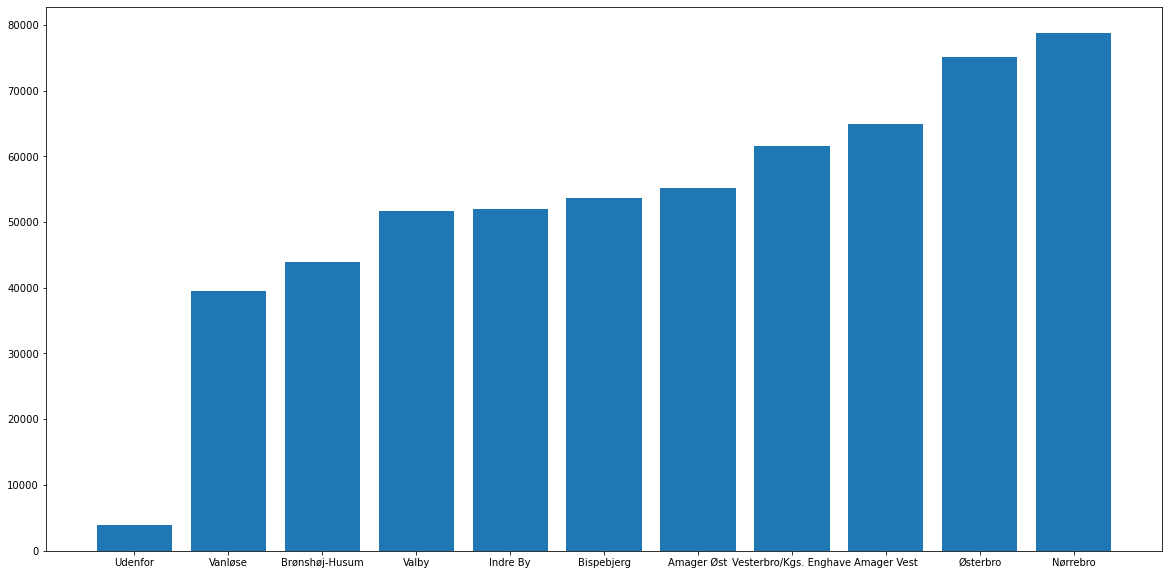

In [3]:
import matplotlib.pylab as plt

sorted_as_tuples = sorted(people.items(), key=lambda item: item[1])
people = {k: v for k, v in sorted_as_tuples}

plt.figure(figsize=(20, 10))
plt.bar(people.keys(), people.values())
plt.show()

In [4]:
mask_alder = (data[:, 2] > 65)& mask_år

p = data[mask_alder & (data[:, 3] != 5100)]

print('folk som ikke er fra danmark:', p[:, -1].sum())

norden = [5101,5104,5106,5107,5110,5120,5901,5902]
# print(p[norden.__contains__(p[:, 3])][-1].sum())


print('fra norden:', p[np.in1d(p[:, 3], norden)][:, -1].sum())


folk som ikke er fra danmark: 3451
fra norden: 608


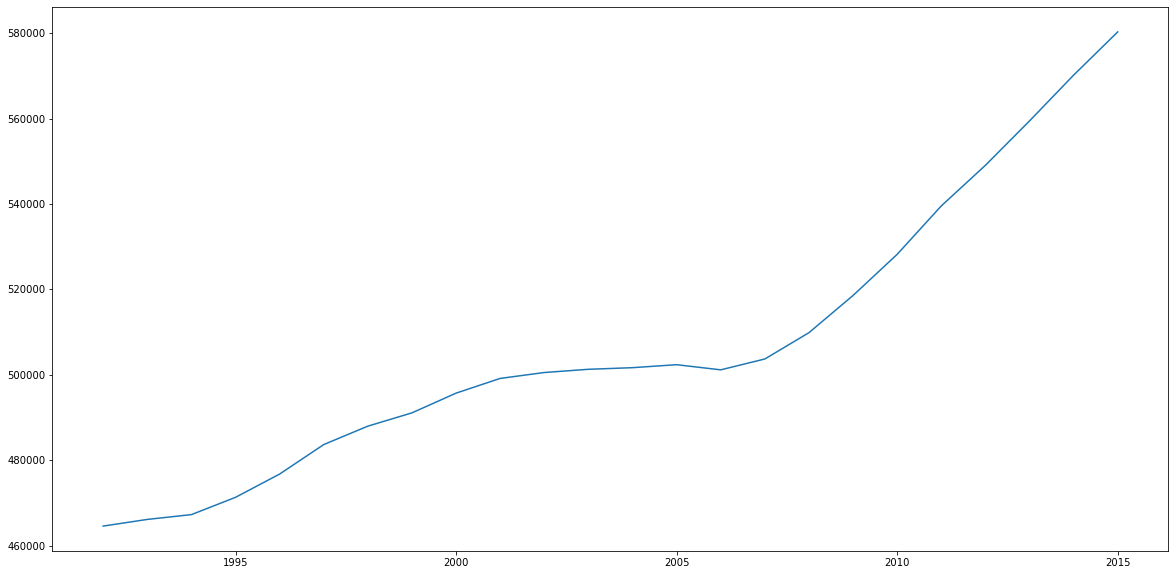

In [5]:
# data[]
years = np.arange(1992,2016)
years_dict = {}

for year in years:
    years_dict[year] = data[data[:,0] == year][:, -1].sum()

x,y = zip(*sorted(years_dict.items()))
plt.figure(figsize=(20, 10))
plt.plot(x,y)
plt.show()

# Exercise 2  A bit harder (Extra only if you have the time)

1. From "Danmarks Statistik" download demographic data here:
https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1


2. clean up the data so it only contains numbers. (If you find this hard to do then Pandas can help (we will cover it next week)
```python
import pandas as pd 
url = 'url from above here'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)
```
Now you have csv data with columns: OMRÅDE;KØN;ALDER;TID;INDHOLD
3. Now load your demographic data with numpy. (Hint: use np.loadtxt() with dtype and delimiter).
4. Use file: BY_KODER_demographics.csv to get cities from the city codes
5. Now find out which city in 2020 has the highest percentage of men (gender code 1),(Hint: create a function to return summed up data by city code ala: def summed_by_city(city_code): returning pct_male 
6. Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020

In [6]:
# url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1'
# df = pd.read_csv(url,sep=';')
# df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
# df.to_csv('demografic_cleaned.csv',header=False, index=False)

In [7]:
import csv

with open ('./data/FOLK1A.csv') as file, open("demografic_cleaned.csv", "w") as outfile:
    csv_reader = csv.reader(file, delimiter=';')
    next(csv_reader, None)
    for row in csv_reader:
        row[3] = row[3][0: -2]
        outfile.writelines(';'.join(row) +'\n')

In [119]:
with open ('./demografic_cleaned.csv') as file:
    data = np.loadtxt(file, delimiter=';', dtype=np.uint)

In [10]:
with open ('../data/DKstat_bykoder.csv') as f:
    byer = np.genfromtxt(f, delimiter=';', dtype=['<i8','U15'])

# for by in byer:
#     data[:,0] ==
#     print(by)
# # print(data[:,0] = 
# #     years_dict[year] = data[data[:,0] == year][:, -1].sum()

In [46]:
import math
mask_men_2020 = data[(data[:,1] == 1) & (data[:, 3] == 2020)]
mask_women_2020 = data[(data[:,1] == 2) & (data[:, 3] == 2020)]

# res = dict({by[1].strip(' '): mask_men_2020[mask_men_2020[:, 0] == 0][:, -1].sum() for by in byer})
# print(res)

def summed_by_city(city_code):
    men = mask_men_2020[mask_men_2020[:, 0] == city_code][:, -1].sum()
    women = mask_women_2020[mask_women_2020[:, 0] == city_code][:, -1].sum()
    res = men/(women + men) * 100
    return res
    
byer_p_men = {}
for by in byer:
    res = summed_by_city(by[0])
    if not math.isnan(res):
        byer_p_men[by[1]] = res

        
sorted_as_tuples = sorted(byer_p_men.items(), key=lambda item: item[1])
byer_p_men = {k: v for k, v in sorted_as_tuples}
byer_p_men
# mask_men_2020[mask_men_2020[:,0] == 0]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in ulong_scalars
  # This is added back by InteractiveShellApp.init_path()


array([(  0, ' Hele-landet'), ( 84, ' Region-Hovedst'),
       (101, ' København'), (147, ' Frederiksberg'), (155, ' Dragør'),
       (185, ' Tårnby'), (165, ' Albertslund'), (151, ' Ballerup'),
       (153, ' Brøndby'), (157, ' Gentofte'), (159, ' Gladsaxe'),
       (161, ' Glostrup'), (163, ' Herlev'), (167, ' Hvidovre'),
       (169, ' Høje-Taastrup'), (183, ' Ishøj'), (173, ' Lyngby-Taarbæk'),
       (175, ' Rødovre'), (187, ' Vallensbæk'), (201, ' Allerød'),
       (240, ' Egedal'), (210, ' Fredensborg'), (250, ' Frederikssund'),
       (190, ' Furesø'), (270, ' Gribskov'), (260, ' Halsnæs'),
       (217, ' Helsingør'), (219, ' Hillerød'), (223, ' Hørsholm'),
       (230, ' Rudersdal'), (400, ' Bornholm'), (411, ' Christiansø'),
       ( 85, ' Region-Sjællan'), (253, ' Greve'), (259, ' Køge'),
       (350, ' Lejre'), (265, ' Roskilde'), (269, ' Solrød'),
       (320, ' Faxe'), (376, ' Guldborgsund'), (316, ' Holbæk'),
       (326, ' Kalundborg'), (360, ' Lolland'), (370, ' Næstved

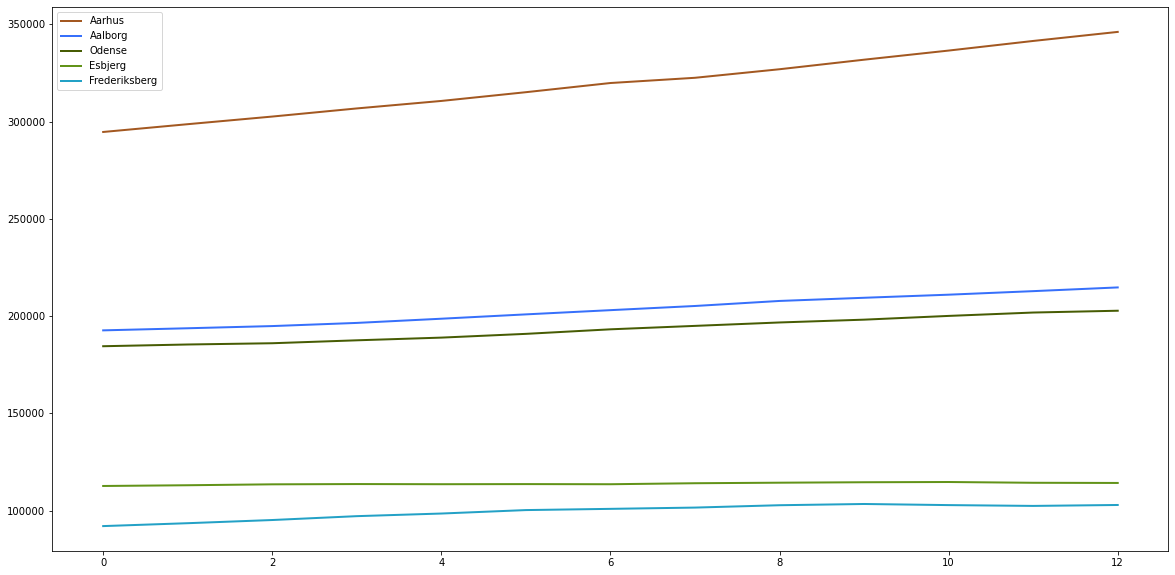

In [150]:
import random as random 
#Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020  

def peopel_in_city(city_code):
    res = {year: 0 for year in data[:, 3]}
    if city_code in byer_i_list:
        for year in data[(data[:, 0] == city_code)]:
            res[year[3]] += year[4]
        return res

byer_i_list = []
for d in data[:, 0]: 
    if not byer_i_list.__contains__(d): byer_i_list.append(d)    

personer_i_byer = {by[1].strip(' '): peopel_in_city(by[0]) for by in byer if by[0] in byer_i_list}

ikke_byer = ['Hele-landet', 'Region-Hovedst', 'Region-Midtjyl', 'Region-Syddanm', 'Region-Sjællan', 'Region-Nordjyl']
for ikke_by in ikke_byer: personer_i_byer.pop(ikke_by)

#sort list
sorted_as_tuples = sorted(personer_i_byer.items(), key=lambda item: item[1][2020], reverse=True)
sorted_as_tuples = sorted_as_tuples[:5]


plt.figure(figsize=(20,10))
for k, v in sorted_as_tuples:
    print()
    plt.plot( list(v.values()), marker='', color=[random.random() ,random.random() ,random.random() ], linewidth=2, label=k)

plt.legend()